# **Pandas**

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('./italy-covid-daywise.csv')
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
df.shape

(248, 4)

data storage format in pandas

In [9]:
data_dict={
    'date': [1, 3, 5, 8],
    'new_cases': [235, 2345, 4567, 3466],
    'new_deaths': [33, 54, 67, 89], 
    'new_tests': [87, 567, 856, 895]
}

In [10]:
df['new_cases']
#df['new_cases'][index]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [11]:
#df.at[row, column]
df.at[243, 'new_cases']

1444.0

In [12]:
df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [13]:
cases_df=df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


data at a row

In [14]:
df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [15]:
df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [16]:
df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


# NaN

In [17]:
df.at[0, 'new_tests']

nan

row number of first non NaN value in any column

In [18]:
df.new_tests.first_valid_index()

111

In [19]:
df.loc[108 : 113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [20]:
df.sample(10)

,date,new_cases,new_deaths,new_tests
67,2020-03-07,778.0,49.0,NaN
25,2020-01-25,0.0,0.0,NaN
144,2020-05-23,652.0,130.0,42579.0
72,2020-03-12,2313.0,196.0,NaN
58,2020-02-27,78.0,1.0,NaN
245,2020-09-01,996.0,6.0,54395.0
101,2020-04-10,4204.0,612.0,NaN
96,2020-04-05,4805.0,681.0,NaN
129,2020-05-08,1401.0,274.0,45428.0
225,2020-08-12,412.0,6.0,27330.0


# Analyzing data from dataframes

In [24]:
total_cases=df.new_cases.sum()
print(total_cases)

total_tests=df.new_tests.sum()
print(total_tests)

271515.0
4279456.0


### sorting and querying

In [26]:
high_new_cases=df.new_cases>1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [32]:
df[high_new_cases]
#df[df.new_cases>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


adding new columns


In [34]:
df['positive_rate']=df.new_cases / df.new_tests
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


### sorting rows using columns values

In [43]:
df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


In [48]:
df.at[172, "new_cases"]=(df.at[171, "new_cases"]+df.at[173, "new_cases"])/2
df.at[172, "new_cases"]

297.5

converting string to date format

In [53]:
df['date']=pd.to_datetime(df.date)
df['date']

# df.date is same is df['date]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [61]:
df['year']=pd.DatetimeIndex(df.date).year
df['month']=pd.DatetimeIndex(df.date).month
df['day']=pd.DatetimeIndex(df.date).day
df['weekday']=pd.DatetimeIndex(df.date).weekday
df.head()

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5


In [62]:
df_may=df[df.month==5]
df_may

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,0.042806,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,0.062918,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,0.070248,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,0.060394,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,0.037906,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,0.028461,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,0.105671,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,0.030840,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,0.036768,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,0.034508,2020,5,10,6


In [66]:
df_may_metrices=df_may[['new_cases', 'new_tests', 'new_deaths']]
df_may_metrices

,new_cases,new_tests,new_deaths
122,1872.0,43732.0,285.0
123,1965.0,31231.0,269.0
124,1900.0,27047.0,474.0
125,1389.0,22999.0,174.0
126,1221.0,32211.0,195.0
127,1075.0,37771.0,236.0
128,1444.0,13665.0,369.0
129,1401.0,45428.0,274.0
130,1327.0,36091.0,243.0
131,1083.0,31384.0,194.0


In [68]:
df_may_total=df_may_metrices.sum()
df_may_total

new_cases       29073.0
new_tests     1078720.0
new_deaths       5658.0
dtype: float64

In [69]:
df.new_cases.mean()

1096.6149193548388

In [71]:
#average on sundays
df[df.weekday==6].new_cases.mean()

1247.2571428571428

### Grouping and aggregation

In [76]:
df_month=df.groupby("month")[['new_cases', 'new_tests', 'new_deaths']]
df_month.sum()

,new_cases,new_tests,new_deaths
month,,,
1,3.0,0.0,0.0
2,885.0,0.0,21.0
3,100851.0,0.0,11570.0
4,101852.0,419591.0,16091.0
5,29073.0,1078720.0,5658.0
6,8217.5,830354.0,1404.0
7,6722.0,797692.0,388.0
8,21060.0,1098704.0,345.0
9,3297.0,54395.0,20.0


In [79]:
df_weekday=df.groupby('weekday')[['new_cases', 'new_tests', 'new_deaths']]
df_weekday.mean()

,new_cases,new_tests,new_deaths
weekday,,,
0,1109.142857,19826.700000,124.800000
1,918.638889,31166.900000,129.944444
2,927.305556,34665.210526,144.750000
3,1095.666667,34488.578947,141.472222
4,1189.714286,39225.684211,144.885714
5,1198.528571,34589.473684,157.000000
6,1247.257143,28588.105263,159.457143


In [85]:
df['total_cases']=df.new_cases.cumsum()
df['total_tests']=df.new_tests.cumsum()
df['total_deaths']=df.new_deaths.cumsum()

df[105:112]

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_tests,total_deaths
105,2020-04-14,3153.0,564.0,NaN,NaN,2020,4,14,1,159516.0,NaN,20465.0
106,2020-04-15,2972.0,604.0,NaN,NaN,2020,4,15,2,162488.0,NaN,21069.0
107,2020-04-16,2667.0,578.0,NaN,NaN,2020,4,16,3,165155.0,NaN,21647.0
108,2020-04-17,3786.0,525.0,NaN,NaN,2020,4,17,4,168941.0,NaN,22172.0
109,2020-04-18,3493.0,575.0,NaN,NaN,2020,4,18,5,172434.0,NaN,22747.0
110,2020-04-19,3491.0,480.0,NaN,NaN,2020,4,19,6,175925.0,NaN,23227.0
111,2020-04-20,3047.0,433.0,7841.0,0.388598,2020,4,20,0,178972.0,7841.0,23660.0


### merging data from multiple sources

In [88]:
location_df=pd.read_csv('covid-countries-data.csv')

In [89]:
location_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


In [90]:
location_df[location_df.location=='Italy']

,location,total_cases,total_deaths,total_tests
98,Italy,271515.0,35497.0,5214766.0


In [92]:
df['location']="Italy"
df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_tests,total_deaths,location
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,NaN,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,NaN,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,NaN,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,NaN,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,NaN,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,4182478.0,35473.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,4225061.0,35477.0,Italy
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,4279456.0,35483.0,Italy
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,NaN,35491.0,Italy


In [93]:
merged_df=df.merge(location_df, on='location')
merged_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases_x,total_tests_x,total_deaths_x,location,total_cases_y,total_deaths_y,total_tests_y
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,271515.0,35497.0,5214766.0
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,271515.0,35497.0,5214766.0
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,271515.0,35497.0,5214766.0
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,271515.0,35497.0,5214766.0
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,271515.0,35497.0,5214766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,4182478.0,35473.0,Italy,271515.0,35497.0,5214766.0
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,4225061.0,35477.0,Italy,271515.0,35497.0,5214766.0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,4279456.0,35483.0,Italy,271515.0,35497.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,NaN,35491.0,Italy,271515.0,35497.0,5214766.0


In [95]:
result_df=merged_df[['date', 'new_cases', 'total_cases_y', 'new_deaths', 'total_deaths_y', 'new_tests', 'total_tests_y']]
result_df

,date,new_cases,total_cases_y,new_deaths,total_deaths_y,new_tests,total_tests_y
0,2019-12-31,0.0,271515.0,0.0,35497.0,NaN,5214766.0
1,2020-01-01,0.0,271515.0,0.0,35497.0,NaN,5214766.0
2,2020-01-02,0.0,271515.0,0.0,35497.0,NaN,5214766.0
3,2020-01-03,0.0,271515.0,0.0,35497.0,NaN,5214766.0
4,2020-01-04,0.0,271515.0,0.0,35497.0,NaN,5214766.0
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,271515.0,1.0,35497.0,53541.0,5214766.0
244,2020-08-31,1365.0,271515.0,4.0,35497.0,42583.0,5214766.0
245,2020-09-01,996.0,271515.0,6.0,35497.0,54395.0,5214766.0
246,2020-09-02,975.0,271515.0,8.0,35497.0,NaN,5214766.0


In [98]:
result_df.to_csv('results.csv', index=None)

<Axes: >

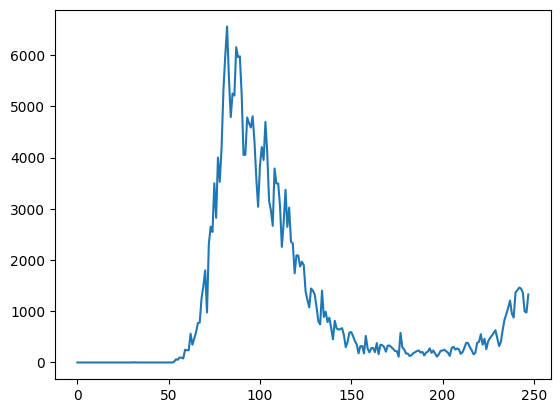

In [99]:
result_df.new_cases.plot()

In [100]:
result_df.set_index('date', inplace=True)

<Axes: xlabel='date'>

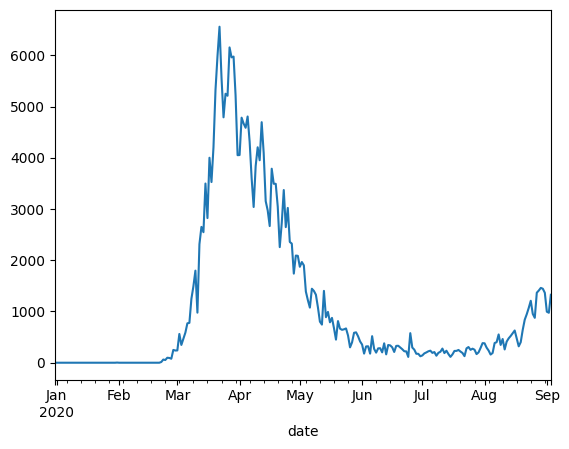

In [101]:
result_df.new_cases.plot()

In [102]:
result_df.head()

,new_cases,total_cases_y,new_deaths,total_deaths_y,new_tests,total_tests_y
date,,,,,,
2019-12-31,0.0,271515.0,0.0,35497.0,NaN,5214766.0
2020-01-01,0.0,271515.0,0.0,35497.0,NaN,5214766.0
2020-01-02,0.0,271515.0,0.0,35497.0,NaN,5214766.0
2020-01-03,0.0,271515.0,0.0,35497.0,NaN,5214766.0
2020-01-04,0.0,271515.0,0.0,35497.0,NaN,5214766.0


<Axes: xlabel='date'>

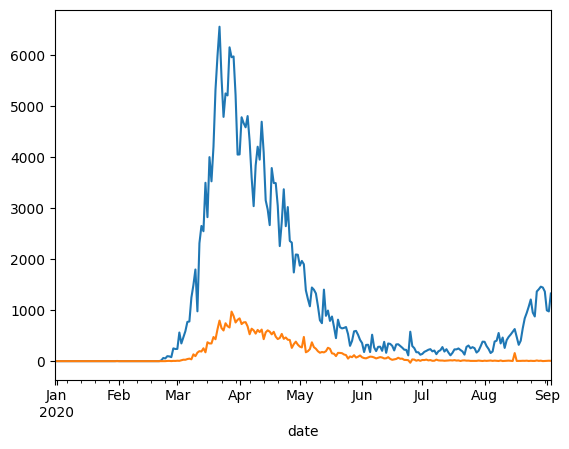

In [103]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

<Axes: >

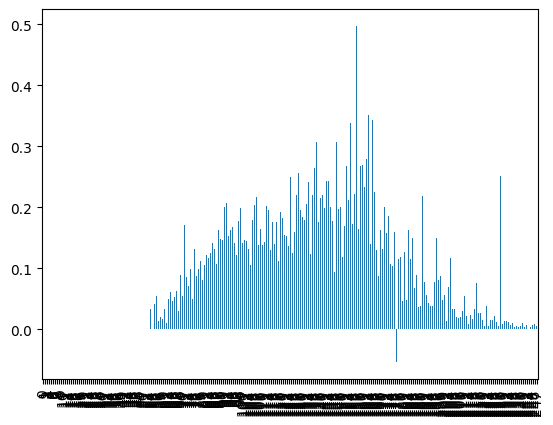

In [114]:
death_rate_perday = df.new_deaths / df.new_cases
death_rate_perday.plot(kind='bar')